# Part I: Research Question
## A. Purpose of the Data Mining Report
### A1. Research Question

Can K-means clustering uncover meaningful, distinct patterns from continuous customer attributes?

### A2. Goal of the Data Analysis

The goal of this analysis is to use the K-means clustering algorithm to group customers with similar attributes. This will be achieved by grouping customers by their shared attributes such as income, age, and other continuous customer attributes. Such groupings can be used to inform the stakeholders' development of customer retention strategies.

# Part II: Technique Justification
## B. Reasons for Chosen Clustering Technique
### B1. Clustering Technique Data Analysis

K-means clustering is an algorithm that groups data into clusters, with the goal of grouping similar points together to discover underlying patterns within the data. The method works by randomly selecting K points from the dataset, the initial cluster centroids, then calculating the distance between each data point and each of the centroids. Then each data point is assigned to the cluster whose centroid is closest to it, which forms K clusters. After assigning all data points to clusters, the centroids are recalculated by taking the mean of all data points in each cluster. This process is repeated until the centroids no longer change significantly or upon reaching a specified number of iterations (Sharma, 2019). The expected outcome of this algorithm will be the grouping of customers with similar characteristics.

### B2. Assumptions of the Clustering Technique
- K-means clustering algorithm assumes clusters are spherical and isotropic, meaning their radius is approximately equal in all directions. The centroid is assigned to the mean determined by the algorithm from the average of the data points in a cluster, making it susceptible to non-sperical or elongated clusters.
- K-means clustering algorithm assumes all clusters have the same variance, such that for every cluster, the distribution of data points around the center is approximately the same.
- K-means clustering algorithm assumes clusters have similar size, as clusters with more data points will affect the cluster mean.

(Demonstration of K-Means Assumptions, 2023)

### B3. Packages and Libraries Used to Support Analysis

| Packages/Libraries | Method/Function | Usage |
| -------- | -------- | -------- |
| Pandas | `.isnull`, `.duplicated`, and `.sum` | important basic functionality |
| Pandas | `.quantile` | outlier detection |
| Pandas | `get_dummies()` | one-hot encoding of categorical variables |
| matplotlib.pyplot | `title` and `show` | figure generation |
| sklearn.preprocessing | `RobustScaler` | data standardization |
| sklearn.cluster | `KMeans` | model creation |
| sklearn.metrics | `silhouette_score` | model evaluation |
 

# Part III: Data Preparation
## C. Performing Data Preparation
### C1. Data Preprocessing Goal
One data preprocessing goal for this analysis is standardization, as the K-means algorithm utilizes the distance between data points, which is sensitive to the scale of variables. Since outliers can significantly affect the clustering by distorting the centers, it is necessary to transform the data to a normal distribution in order to obtain meaningful clusters. `RobustScaler` will be used to achieve this goal.

### C2. Initial Data Set Variables

| Variable | Continuous/Categorical |
| -------- | -------- | 
| Income | Continuous |
| Age | Continuous |
| Outage_sec_perweek | Continuous |
| Tenure | Continuous |
| MonthlyCharge | Continuous |
| Bandwidth_GB_Year | Continuous |


### C3. Explanation of Each Step to Prepare the Data
Much of the code to prepare the data was adapted from my D209 Performance Assessment. The steps to prepare the data are:

- detect duplicates, missing values, and outliers
- treatment of NAs and outliers (retention of reasonable outliers)
- feature selection by creating a subset of relevant variables
- standardization of relevant variables

In [2]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
## C3 The following cells include the annotated code used to prepare the data.
# See code attached, in D212_PA_MendezD_Task1.ipynb

# Load data into a data frame with Pandas' .read_csv() function
df = pd.read_csv('/Users/drewmendez/Documents/WGU/D212/data/churn_clean.csv')


def printDupesNulls(data_frame):
# Detect duplicates with Pandas' .duplicated method chained with .sum() method.
# Identify missing values in the data frame with Pandas' .isnull() method, 
# then sum the resulting series with the .sum() method
    
    duplicate_count = data_frame.duplicated().sum()
    missing_values_count = data_frame.isnull().sum()
    print('Number of duplicate rows:', duplicate_count)
    print("Number of missing values per variable:")
    print(missing_values_count)

In [4]:
## C3 Detection of Duplicates and Missing Values

printDupesNulls(df)

Number of duplicate rows: 0
Number of missing values per variable:
CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
Onlin

In [5]:
## C3 Subsetting Relevant Variables

continuous_vars = df[['Income', 'Age', 'Outage_sec_perweek', 'Tenure', 
                 'MonthlyCharge', 'Bandwidth_GB_Year']]

continuous_vars = continuous_vars.astype('float')

continuous_vars.head()

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,68.0,7.978323,6.795513,172.455519,904.536110
1,21704.77,27.0,11.699080,1.156681,242.632554,800.982766
2,9609.57,50.0,10.752800,15.754144,159.947583,2054.706961
3,18925.23,48.0,14.913540,17.087227,119.956840,2164.579412
4,40074.19,83.0,8.147417,1.670972,149.948316,271.493436


In [6]:
## C3 Scaling Relevant Variables

scaler = RobustScaler()

cont_scaled = continuous_vars.copy()

cont_scaled = scaler.fit_transform(cont_scaled)

cont_scaled = pd.DataFrame(cont_scaled, columns=continuous_vars.columns)

cont_scaled.head()

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.135462,0.416667,-0.516350,-0.534613,0.081817,-0.546019
1,-0.337018,-0.722222,0.425311,-0.639889,1.236890,-0.569826
2,-0.692535,-0.083333,0.185824,-0.367356,-0.124057,-0.281591
3,-0.418717,-0.138889,1.238837,-0.342468,-0.782281,-0.256331
4,0.202919,0.833333,-0.473555,-0.630288,-0.288639,-0.691557


In [7]:
## C4 Copy of the Cleaned Data Set

cont_scaled.to_csv('D212_PA_MendezD_Task1_variables.csv', sep = ',', encoding = 'utf-8', index = False)

# Part IV: Analysis

## D. Performing the Data Analysis
### D1. Determining the Optimal Number of Clusters K

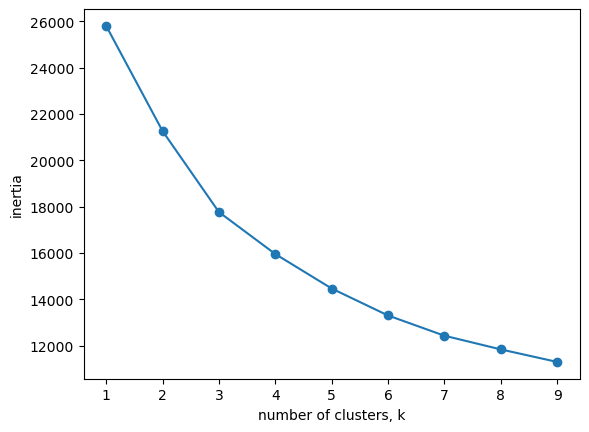

In [9]:
## D1. Optimal Number of Clusters

ks = range(1, 10)
inertias = []

for k in ks:
    KMmodel = KMeans(n_clusters=k)
    KMmodel.fit(cont_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(KMmodel.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In conducting the K-means clustering analysis, the method iterates over a range of 1-10 to find the optimal number of clusters, K, by fitting a K-means model to the chosen variables and adding inertia, or the sum of squared distances between each data point and its nearest cluster. By plotting the elbow graph, Inertia vs K, we can determine the optimal number of clusters at the point where intertia decreases more slowly. For this model, the optimal number of cluster would be K = 3.

### D2. Code to Perform the Clustering Analysis

In [11]:
## D2 Code to Perform the Clustering Analysis

# Create the KMeans cluster
model = KMeans(n_clusters = 3)
model.fit(cont_scaled)
labels = model.labels_
centers = model.cluster_centers_
print(labels)
print(centers)

[1 1 1 ... 0 0 0]
[[-0.10177518  0.01342178  0.00164244  0.46187897  0.09688949  0.50958797]
 [-0.10792278 -0.00622687  0.0065347  -0.49271893  0.09042946 -0.45467159]
 [ 1.60498961 -0.00460851 -0.04330688 -0.02920662  0.04199123  0.0132713 ]]


n_clusters = 2, the silhouette score is 0.20277840002766878
n_clusters = 3, the silhouette score is 0.2029677688791523
n_clusters = 4, the silhouette score is 0.1887590841655926
n_clusters = 5, the silhouette score is 0.17693514623280998
n_clusters = 6, the silhouette score is 0.1684462813690749
n_clusters = 7, the silhouette score is 0.17469715015734708
n_clusters = 8, the silhouette score is 0.17472584681407277
n_clusters = 9, the silhouette score is 0.17559610838651923
n_clusters = 10, the silhouette score is 0.17257321351325983


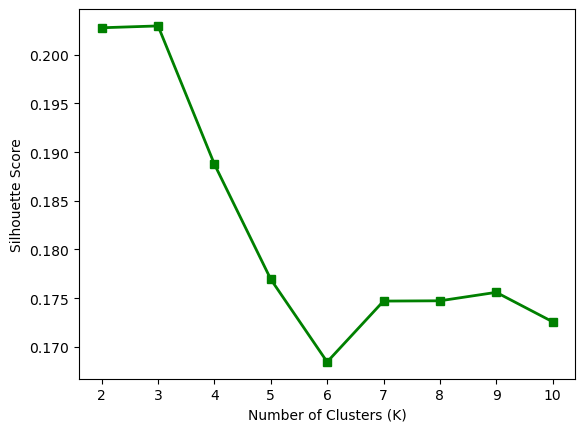

In [12]:
k_range = range (2, 11)

# List for silhouette scores
silhouette_scores = []

# Various numbers of clusters
for k in k_range:
    kmeanModel = KMeans(n_clusters = k, n_init=10)
    kmeanModel.fit(cont_scaled)

# Calculating Silhouette Score
    silhouette_avg = silhouette_score(cont_scaled, kmeanModel.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"n_clusters = {k}, the silhouette score is {silhouette_avg}")

# visualizing the silhouette score
plt.plot(k_range, silhouette_scores, 's-', linewidth = 2, color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Inertia
inertia = model.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(cont_scaled, labels)


# Print the metrics
print("Silhouette Score:", silhouette_avg) 

Silhouette Score: 0.20305459347857108


In [14]:
# Centroids

centroid = pd.DataFrame(model.cluster_centers_, columns = cont_scaled.columns)

centroid

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.101775,0.013422,0.001642,0.461879,0.096889,0.509588
1,-0.107923,-0.006227,0.006535,-0.492719,0.090429,-0.454672
2,1.604990,-0.004609,-0.043307,-0.029207,0.041991,0.013271


In [15]:
# Analyzing Clusters

continuous_vars['Cluster'] = model.labels_.tolist()

df_dummies = pd.get_dummies(df, columns = ['Gender'])

continuous_vars[['Gender_Female', 'Gender_Male', 'Gender_Nonbinary']] = df_dummies[['Gender_Female', 'Gender_Male', 'Gender_Nonbinary']]

continuous_vars.groupby('Cluster').agg({'Income': 'mean',
                                    'Age': 'mean',
                                    'Outage_sec_perweek': 'mean',
                                    'Tenure': 'mean',
                                    'MonthlyCharge': 'mean',
                                    'Bandwidth_GB_Year': 'mean',
                                    'Gender_Female': 'mean',
                                    'Gender_Male': 'mean',
                                    'Gender_Nonbinary': 'mean'})

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year,Gender_Female,Gender_Male,Gender_Nonbinary
Cluster,,,,,,,,,
0,29699.846404,53.486931,10.025614,60.168738,173.374501,5496.055896,0.507260,0.473136,0.019603
1,29507.568094,52.778318,10.045683,9.039501,172.975016,1301.740507,0.487117,0.486874,0.026009
2,87773.869572,52.819840,9.843046,33.897460,170.037347,3339.995490,0.527366,0.448119,0.024515


# Part V: Data Summary and Implications

## E. Summary of the Data Analysis
### E1. Quality of the Clusters 
The quality of the K-means clusters was evaluated above using the Silhouette score, which takes the average distance between data points in a cluster and compares them to neighboring clusters. The metric ranges from -1 to 1, where scores close to 1 suggest that clusters are well-separated and the clustering is good, close to 0 suggests that clusters are overlapping and clusters may not be meaningful, and negative scores suggest clustering may be incorrect with data points potentially assigned to the wrong clusters (Banerji, 2021). The Silhouette score of this model is 0.2030, which indicates that the clusters may not be meaningful.


### E2. Results and Implications of Clustering Analysis

Based on the centroids given above:

- Cluster One
    - Income: Slightly below average (-0.104).
    - Age: Very close to the mean (0.014).
    - Outage_sec_perweek: Very close to the mean (0.002).
    - Tenure: Above average (0.462), indicating longer tenure.
    - MonthlyCharge: Slightly above average (0.098).
    - Bandwidth_GB_Year: Above average (0.510), indicating higher bandwidth usage.
- Cluster Two
    - Income: Slightly below average (-0.108).
    - Age: Very close to the mean (-0.006).
    - Outage_sec_perweek: Very close to the mean (0.007).
    - Tenure: Below average (-0.493), indicating shorter tenure.
    - MonthlyCharge: Slightly above average (0.090).
    - Bandwidth_GB_Year: Below average (-0.455), indicating lower bandwidth usage.
- Cluster Three
    - Income: Significantly above average (1.601).
    - Age: Very close to the mean (-0.006).
    - Outage_sec_perweek: Slightly below average (-0.046).
    - Tenure: Very close to the mean (-0.026).
    - MonthlyCharge: Slightly above average (0.041).
    - Bandwidth_GB_Year: Very close to the mean (0.016).
    
A key implication of these centroids is that Cluster Three has significantly higher income than the other two, while Clusters One and Two have below average income. Additionally, Cluster Three customers have much longer tenures, while Cluster Two has a short tenure and Cluster One an average tenure. Regarding bandwidth use, Cluster One has a considerably higher bandwidth usage, while Cluster Three has average bandwidth usage, and Cluster Two uses the least bandwidth.

Based on the statistical analysis performed above, the following information can be ascertained from these clusters:

- Cluster One: 50.7% are female, 47.3% are male, and 1.9% are nonbinary. Of these customers, their average income is \$29,651, average age is 53.5, average tenure is 60 months, and average bandwidth GB per year is 5496gb.
- Cluster Two: 48.7% are female, 48.7% are male, and 2.6% are nonbinary. Of these customers, their average income is \$29,500, average age is 52.8, average tenure is 9 months, and average bandwidth GB per year is 1301gb.
- Cluster Three: 52.7% are female, 44.9% are male, and 2.4% are nonbinary. Of these customers, their average income is \$87,672, average age is 52.8, average tenure is 33 months, and average bandwidth GB per year is 3346gb.


### E3. One Limitation of the Data Analysis
One limitation of this analysis is that the K-means algorithm depends on the Euclidean distance, which may not have been an appropriate metric for the dataset, especially if the data has non-linear relationships.


### E4. Recommended Course of Action

By performing the K-means clustering algorithm, patterns of customer characteristics can be observed in the three clusters that were identified. A recommended course of action would be to develop marketing strategies that cater to customers each cluster. Such strategies could include:

- Cluster One: Loyal, High-Bandwidth Customers
    - Loyalty rewards or discount programs to retain long-term customers
    - Premium services that cater to high-bandwidth usage
- Cluster Two: Newer, Low-Bandwidth Customers
    - Onboarding offers to encourage engagement, i.e. first three months at 20% discount
    - Referral programs, i.e. $20 credit for each successful referral
- Cluster Three: High-Income, Average Usage Customers
    - Premium and high-value services that align with their income level
    - Exclusive experiences or services


# Part VI: Demonstration

## F. Panopto Video
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ef41a57f-80fe-4f93-926f-b29a01395259


## G. Acknowledgement of Web Sources
DataCamp (2024). WGU Data Mining II. DataCamp. https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii

Kamara, K. (n.d.). Anayze and interpret K-means results. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3fe13831-fe4b-4c6b-a3eb-b0ee018754bc


 

## H. Acknowledgement of Sources


Banerji, A. (2021, May 18). K-Mean | K Means Clustering | Methods To Find The Best Value Of K. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Demonstration of K-Means Assumptions. (2023, December 9). GeeksforGeeks. https://www.geeksforgeeks.org/demonstration-of-k-means-assumptions/

Sharma, P. (2019, August 19). The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
 